In [1]:
import turtle as t

# Generating the Koch Curve

In [ ]:
def koch(x, L, n):
    if n > 0:
        for angle in [60, -120, 60, 0]:
            koch(angle, L/3, n-1)
            t.left(angle)
    else:
        t.forward(L)
        
def snowflake(x, L, n):
    for i in range(4):
        koch(x, L, n)
        t.right(120)

t.setworldcoordinates(0,0,100,100)
t.color('black')
t.pensize(0.5)
t.penup()
t.setpos(10,72)
t.pendown()
t.hideturtle()
t.tracer(10)
length = 80
n = 5
snowflake(t, length, n) 
t.Screen()
t.exitonclick()

# Calculating the Perimeter

For the sake of analysis, we assume a unit length for each partition of the triangle as it is an arbitrary constant.

In [3]:
import numpy as np
from sympy import *
m = Symbol('m')
length = 1
n = 100

In [4]:
perim_fxn = 3*length*((4/3)**m)
perimeter = limit(perim_fxn,m,oo)
print(perimeter)

oo


In [5]:
perim_plot = []
for i in range(n):
    perim_plot.append(3*length*((4/3)**i))

# Calculating the Area

In [8]:
area=[]
length = 1
for i in range(n):
    if i == 0:
        area.append((np.sqrt(3)/4)*(length**2))
    if i == 1:
        area.append((np.sqrt(3)/4)*(length**2) * (3*(1/3)**2))
    elif i > 1:
        area.append((np.sqrt(3)/4)*(length**2) * (3*(4**(i-1)))*(1/(3**(i))**2))
total_area = np.sum(area)
init_area = area[0]
print('Initial area for n = 0 is equal to =',init_area)
print ('Total area for', n ,'levels is equal to =',total_area)
print('Theoretical total area for n approaches infinity is equal to',init_area*(8/5))

Initial area for n = 0 is equal to = 0.433012701892
Total area for 100 levels is equal to = 0.692820323028
Theoretical total area for n approaches infinity is equal to 0.692820323028


In [9]:
area_plot = [area[0]]
for i in range(0,n-1):
    area_plot.append(area_plot[-1]+area[i+1])

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

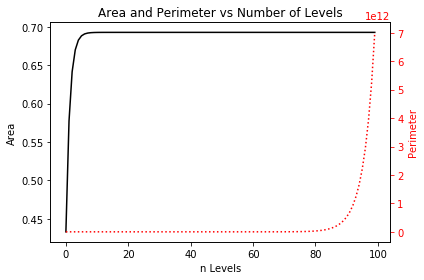

<Figure size 432x288 with 0 Axes>

In [11]:
fig, ax1 = plt.subplots()
ax1.plot(area_plot, 'k-')
ax1.set_xlabel('n Levels')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Area', color='k')
ax1.tick_params('y', colors='k')

ax2 = ax1.twinx()
ax2.plot(perim_plot, 'r:')
ax2.set_ylabel('Perimeter', color='r')
ax2.tick_params('y', colors='r')
plt.title('Area and Perimeter vs Number of Levels')
fig.tight_layout()
plt.show()
plt.savefig('AreaPerim')